In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import cubehelix
from scipy import stats
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

In [119]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [173]:
source = pd.read_csv('linear_regression_data.csv', index_col=0)
source.insert(0, 'Chi_av', (source['Chi_a']+source['Chi_c'])/2)
source.insert(0,'Ds',(source['vbm']+source['IP']))
source.insert(0,'inv_area',(1/source['Area']))
source.insert(0,'Chi_diff', source['Chi_a']-source['Chi_c'])
source.insert(0,'inv_dielec',1/source['Dielectric'])

In [174]:
source.head()

,inv_dielec,Chi_diff,inv_area,Ds,Chi_av,Chi_a,Chi_c,r_a,r_c,na,nc,Area,Dielectric,vbm,IP,comment
Name,,,,,,,,,,,,,,,,
ZnO-O,0.106720,1.79,0.067889,6.44,2.545,3.44,1.65,0.66,1.22,1,1,14.73,9.370290,1.0603,5.3797,NaN
Zns-O,0.140394,0.93,0.067889,12.46,2.115,2.58,1.65,1.05,1.22,1,1,14.73,7.122794,8.4411,4.0189,NaN
ZnSe-O,0.119620,0.90,0.067889,13.18,2.100,2.55,1.65,1.20,1.22,1,1,14.73,8.359822,9.8231,3.3569,NaN
ZnO-S,0.182315,1.79,0.049237,3.68,2.545,3.44,1.65,0.66,1.22,1,1,20.31,5.485000,-2.0720,5.7520,NaN
ZnS-S,0.164994,0.93,0.049237,7.56,2.115,2.58,1.65,1.05,1.22,1,1,20.31,6.060833,2.2657,5.2943,NaN


In [188]:
est_av = smf.ols(formula='Ds ~ Chi_av + inv_area + na + Dielectric', data=source).fit()
est_diff = smf.ols(formula='Ds ~ Chi_diff + inv_area + na + Dielectric', data=source).fit()

In [189]:
est_av.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ds   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           2.90e-10
Time:                        17:05:52   Log-Likelihood:                -11.939
No. Observations:                  19   AIC:                             33.88
Df Residuals:                      14   BIC:                             38.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.6891      1.846      9.583      0.000        13.730    21.648
Chi_av       -10.7680      0.639    -16.855      0.000       -12.138    -9.398
inv_area     217.6977     14.898     14.612      0.000       185.744   249.651
na             1.5047      0.458      3.287      0.005         0.523     2.486
Dielectric     0.1194      0.046      2.589      0.021         0.020     0.218
==============================================================================
Omnibus:                        3.778   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.745
Skew:                          -0.587   Prob(JB):                        0.418
Kurtosis:                       3.910   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
est_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ds   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     42.72
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           1.07e-07
Time:                        17:05:53   Log-Likelihood:                -20.010
No. Observations:                  19   AIC:                             50.02
Df Residuals:                      14   BIC:                             54.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.6645      1.901     -1.927      0.074        -7.742     0.413
Chi_diff      -4.9780      0.467    -10.652      0.000        -5.980    -3.976
inv_area     207.9210     22.637      9.185      0.000       159.369   256.473
na             5.9285      0.806      7.351      0.000         4.199     7.658
Dielectric     0.0019      0.075      0.025      0.980        -0.158     0.162
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   2.592
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.062
Skew:                           0.135   Prob(JB):                        0.970
Kurtosis:                       2.929   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
est.model

In [192]:
def surface_dipole(Chi_av,area,num_anions,dielec):
    return 17.6891 - 10.7680*Chi_av +  217.6977/area + 1.5047*num_anions + 0.1194*dielec

In [193]:
source.head()

,inv_dielec,Chi_diff,inv_area,Ds,Chi_av,Chi_a,Chi_c,r_a,r_c,na,nc,Area,Dielectric,vbm,IP,comment
Name,,,,,,,,,,,,,,,,
ZnO-O,0.106720,1.79,0.067889,6.44,2.545,3.44,1.65,0.66,1.22,1,1,14.73,9.370290,1.0603,5.3797,NaN
Zns-O,0.140394,0.93,0.067889,12.46,2.115,2.58,1.65,1.05,1.22,1,1,14.73,7.122794,8.4411,4.0189,NaN
ZnSe-O,0.119620,0.90,0.067889,13.18,2.100,2.55,1.65,1.20,1.22,1,1,14.73,8.359822,9.8231,3.3569,NaN
ZnO-S,0.182315,1.79,0.049237,3.68,2.545,3.44,1.65,0.66,1.22,1,1,20.31,5.485000,-2.0720,5.7520,NaN
ZnS-S,0.164994,0.93,0.049237,7.56,2.115,2.58,1.65,1.05,1.22,1,1,20.31,6.060833,2.2657,5.2943,NaN


In [194]:
IP_PBE = []; IP_model = []
for i, value in enumerate(source['Ds']):
    IP_PBE.append(source['IP'][i])
    IPe = surface_dipole(source['Chi_av'][i],source['Area'][i],source['na'][i],source['Dielectric'][i]) - source['vbm'][i]
    IP_model.append(IPe)

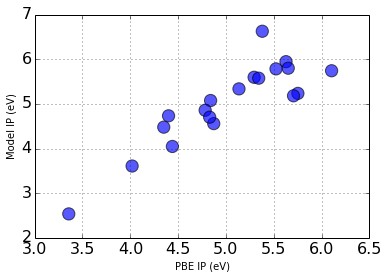

In [195]:
plt.scatter(IP_PBE,IP_model,marker='o',s=150, alpha=0.65)
plt.grid(True)
plt.xlabel('PBE IP (eV)')
plt.ylabel('Model IP (eV)')

## Test the model

In [196]:
test_data = pd.read_csv('testing_data.csv', index_col=0)

In [197]:
test_data.insert(0, 'tChi_av', (test_data['Chi_a']+test_data['Chi_c'])/2)
test_data.insert(0,'tDs',(test_data['vbm']+test_data['IP']))
test_data.insert(0,'tinv_area',(1/test_data['Area']))

In [198]:
IP_III_V = []; mIP_III_V = []; IP_II_VI = []; mIP_II_VI = []; IP_O = []; mIP_O = []
for i in range(0,13):
    IP_II_VI.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i],test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_II_VI.append(IPe)
for i in range(13,22):
    IP_O.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i],test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_O.append(IPe)  
for i in range(22,31):
    IP_III_V.append(test_data['IP'][i])
    IPe = surface_dipole(test_data['tChi_av'][i],test_data['Area'][i],test_data['na'][i],test_data['Dielectric'][i]) - test_data['vbm'][i]
    mIP_III_V.append(IPe)

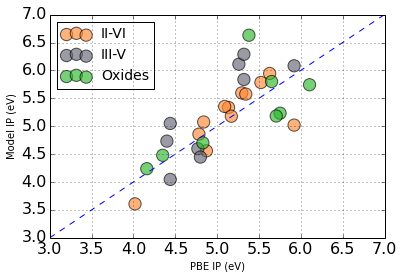

In [199]:
plt.scatter(IP_II_VI,mIP_II_VI,marker='o',s=150, alpha=0.65,c='#ff8833',label='II-VI')
plt.scatter(IP_III_V,mIP_III_V,marker='o',s=150, alpha=0.65,c='#666677',label='III-V')
plt.scatter(IP_O,mIP_O,marker='o',s=150, alpha=0.65,c='#2EB82E',label='Oxides')
plt.grid(True)
plt.legend()
eyeline_x=np.arange(3,8)
plt.plot(eyeline_x,eyeline_x,'--',c='b')
plt.xlim(3,7)
plt.ylim(3,7)
plt.legend(loc=2, fontsize=14)
plt.xlabel('PBE IP (eV)')
plt.ylabel('Model IP (eV)')

In [210]:
surface_dipole((3.44+1.96)/2,4.37*3.18,1,13.5)

7.397636893916493